## Pairwise scatter plot - filter DNA>100, normalization log2(RNA/DNA)

In [24]:
# Load necessary library
library(readr)

# Read the CSV file
counts <- read_csv("counts-aso.csv")

# Filter columns starting from the 3rd column onwards
counts <- counts[, 3:ncol(counts)]

# Define the columns to check
columns_to_check <- c("hek-gDNA1", "hek-gDNA2", "hek-gDNA3")

# Filter rows where all specified columns have values greater than 100
data_filtered <- counts[apply(counts[, columns_to_check], 1, function(x) all(x > 100)), ]

# Print the number of remaining rows
print(nrow(data_filtered))

Rows: 12000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Seq, Name
dbl (14): hek-gDNA1, hek-gDNA2, hek-gDNA3, hek-RNA1, hek-RNA2, hek-RNA3, sk-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 11719


In [25]:
# Calculate ratios for HEK
data_filtered$`hek-rd1` <- data_filtered$`hek-RNA1` / data_filtered$`hek-gDNA1`
data_filtered$`hek-rd2` <- data_filtered$`hek-RNA2` / data_filtered$`hek-gDNA2`
data_filtered$`hek-rd3` <- data_filtered$`hek-RNA3` / data_filtered$`hek-gDNA3`

# Select only the ratio columns
counts_rd <- data_filtered[, c("hek-rd1", "hek-rd2", "hek-rd3")]

# Replace 0 values with NA to avoid log2(-Inf), Pairwiase ignore NA value
counts_rd[counts_rd == 0] <- NA

# Apply the log transformation (log base 2)
counts_rd_log <- log2(counts_rd)

# Calculate the correlation matrix using pairwise complete observations
corr_log_hek <- cor(counts_rd_log, use = "pairwise.complete.obs", method = "pearson")

# Print the correlation matrix
print(corr_log_hek)


          hek-rd1   hek-rd2   hek-rd3
hek-rd1 1.0000000 0.9873399 0.9849722
hek-rd2 0.9873399 1.0000000 0.9893595
hek-rd3 0.9849722 0.9893595 1.0000000


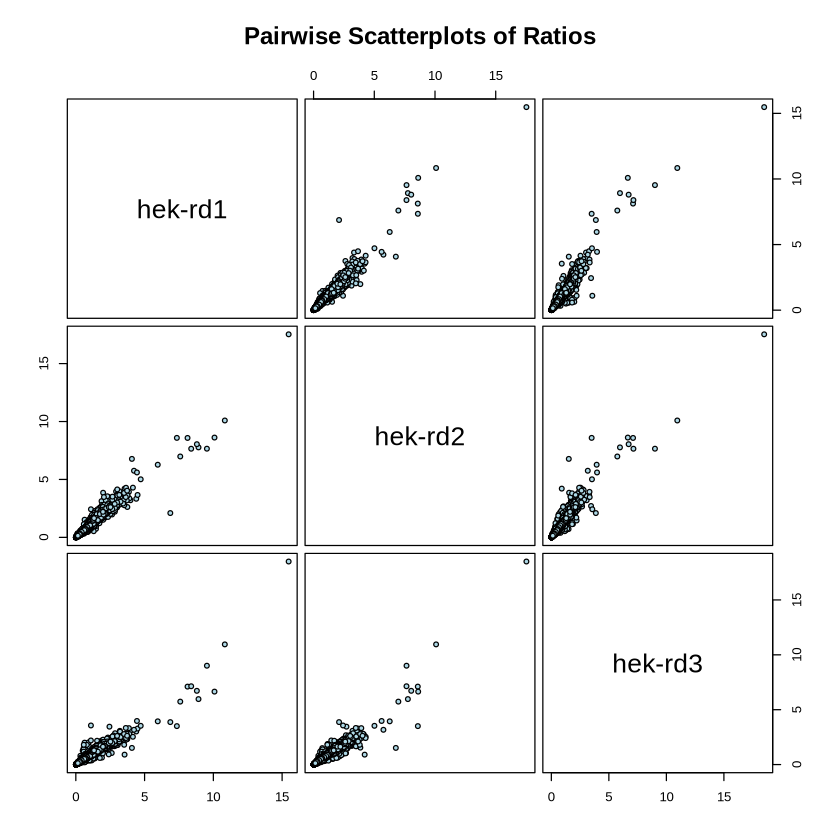

In [26]:
# Draw pairwise scatterplots
pairs(counts_rd, 
      main = "Pairwise Scatterplots of Ratios", 
      pch = 21, 
      bg = "lightblue", 
      cex = 0.8, 
      gap = 0.5, 
      labels = colnames(counts_rd))


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3 rows containing missing values”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


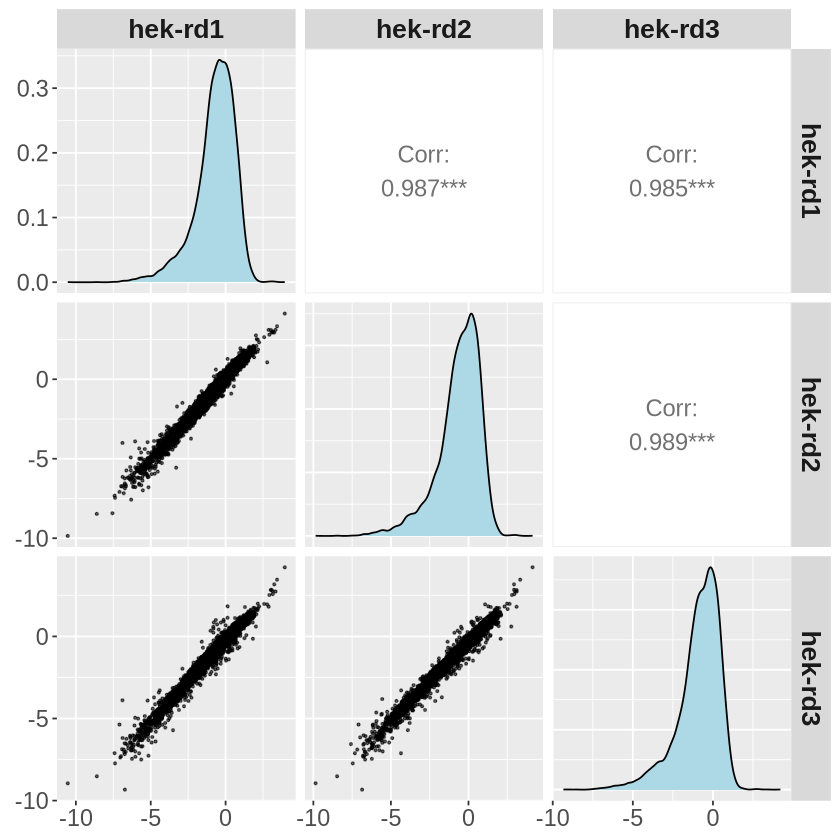

In [27]:
library(GGally)
library(ggplot2)

# Custom function to format correlation values with three decimal places
format_corr <- function(data, mapping, ...) {
  ggally_cor(data, mapping, ..., digits = 3)
}

# Create a custom pair plot with formatted correlations
plot <- ggpairs(
  counts_rd_log,
  upper = list(continuous = wrap(format_corr, size = 5)),  # Custom correlation function
  lower = list(continuous = wrap("points", alpha = 0.6, size = 0.5)),  # Scatterplots
  diag = list(continuous = wrap("densityDiag", fill = "lightblue")) # Density plots
  # title = "Pairwise Scatterplots and correlations of HEK293T log2(RNA/DNA)"
)

# Adjust text sizes for axis labels and strip labels
plot + theme(
  axis.text.x = element_text(size = 14),  # Increase x-axis tick label size
  axis.text.y = element_text(size = 14),  # Increase y-axis tick label size
  axis.title.x = element_text(size = 16), # Increase x-axis title size
  axis.title.y = element_text(size = 16), # Increase y-axis title size
  strip.text = element_text(size = 16, face = "bold") # Increase facet labels (hek_rd1, hek_rd2, etc.)
)


## For SK cell line

In [28]:
# Load necessary library
library(readr)

# Read the CSV file
counts <- read_csv("counts-aso.csv")

# Filter columns starting from the 3rd column onwards
counts <- counts[, 3:ncol(counts)]

# Define the columns to check
columns_to_check <- c("sk-gDNA1", "sk-gDNA2", "sk-gDNA3")

# Filter rows where all specified columns have values greater than 100
data_filtered <- counts[apply(counts[, columns_to_check], 1, function(x) all(x > 100)), ]

# Print the number of remaining rows
print(nrow(data_filtered))

Rows: 12000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Seq, Name
dbl (14): hek-gDNA1, hek-gDNA2, hek-gDNA3, hek-RNA1, hek-RNA2, hek-RNA3, sk-...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 11527


In [29]:
# Calculate ratios for HEK
data_filtered$`sk-rd1` <- data_filtered$`sk-RNA1` / data_filtered$`sk-gDNA1`
data_filtered$`sk-rd2` <- data_filtered$`sk-RNA2` / data_filtered$`sk-gDNA2`
data_filtered$`sk-rd3` <- data_filtered$`sk-RNA3` / data_filtered$`sk-gDNA3`

# Select only the ratio columns
counts_rd <- data_filtered[, c("sk-rd1", "sk-rd2", "sk-rd3")]

# Replace 0 values with NA to avoid log2(-Inf), Pairwiase ignore NA value
counts_rd[counts_rd == 0] <- NA

# Apply the log transformation (log base 2)
counts_rd_log <- log2(counts_rd)

# Calculate the correlation matrix using pairwise complete observations
corr_log_sk <- cor(counts_rd_log, use = "pairwise.complete.obs", method = "pearson")

# Print the correlation matrix
print(corr_log_sk)

          sk-rd1    sk-rd2    sk-rd3
sk-rd1 1.0000000 0.9805001 0.9273687
sk-rd2 0.9805001 1.0000000 0.9564524
sk-rd3 0.9273687 0.9564524 1.0000000


Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3 rows containing missing values”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


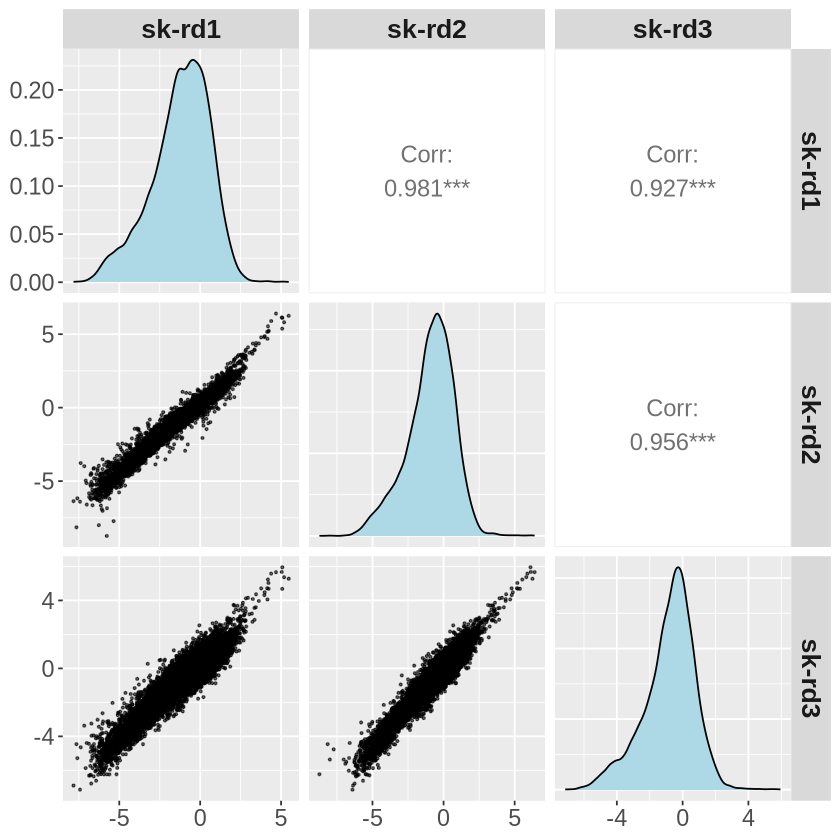

In [30]:
library(GGally)
library(ggplot2)

# Custom function to format correlation values with three decimal places
format_corr <- function(data, mapping, ...) {
  ggally_cor(data, mapping, ..., digits = 3)
}

# Create a custom pair plot with formatted correlations
plot <- ggpairs(
  counts_rd_log,
  upper = list(continuous = wrap(format_corr, size = 5)),  # Custom correlation function
  lower = list(continuous = wrap("points", alpha = 0.6, size = 0.5)),  # Scatterplots
  diag = list(continuous = wrap("densityDiag", fill = "lightblue")) # Density plots
  # title = "Pairwise Scatterplots and correlations of HEK293T log2(RNA/DNA)"
)

# Adjust text sizes for axis labels and strip labels
plot + theme(
  axis.text.x = element_text(size = 14),  # Increase x-axis tick label size
  axis.text.y = element_text(size = 14),  # Increase y-axis tick label size
  axis.title.x = element_text(size = 16), # Increase x-axis title size
  axis.title.y = element_text(size = 16), # Increase y-axis title size
  strip.text = element_text(size = 16, face = "bold") # Increase facet labels (hek_rd1, hek_rd2, etc.)
)